In [272]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import scipy.stats
from sklearn.cluster import KMeans

In [ ]:
# K-means on galton, k-means on penguins

In [273]:
galton = pd.read_csv("galton.csv")
galton.head()
y = galton.childHeight.values

Text(0, 0.5, 'Number')

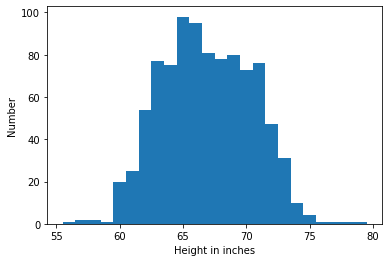

In [274]:
plt.hist(galton.childHeight, bins=np.arange(55, 80) + .5) 
plt.xlabel("Height in inches")
plt.ylabel("Number")

In [275]:
km = KMeans(n_clusters=1).fit(galton.childHeight.values.reshape((-1,1)))

In [276]:
galton.childHeight.values.reshape((-1,1 )).shape

(934, 1)

In [277]:
km.predict(np.array([65, 63, 70]).reshape(-1,1))


array([0, 0, 0], dtype=int32)

In [278]:
classes = km.predict(galton.childHeight.values.reshape((-1,1 )))

In [279]:
from collections import Counter
Counter(classes)

Counter({0: 934})

In [ ]:
# yes, with k=1 every data point in 1d feature space gets
# the same label.  But we do get a fit:

In [ ]:
km.cluster_centers_

In [ ]:
# Well... a one-number, one-dimensional fit.

In [280]:
km2 = KMeans(n_clusters=2).fit(galton.childHeight.values.reshape((-1,1)))

In [281]:
classes2 = km2.predict(galton.childHeight.values.reshape((-1,1 )))

In [282]:
Counter(classes2)

Counter({0: 458, 1: 476})

In [283]:
km2.cluster_centers_

array([[69.79017467],
       [63.81680672]])

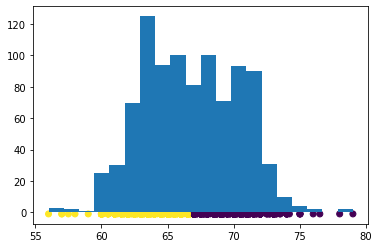

In [284]:
plt.hist(galton.childHeight.values.reshape((-1,1 )), bins=20)
plt.scatter(galton.childHeight.values.reshape((-1,1 )) ,-np.ones(galton.childHeight.values.reshape((-1,1 )).shape), c=classes2)

In [ ]:
# This plot is all I can really get from k-means 
# in one dimension.  There is a single point that 
# discriminates between the classes... that's all 
# she wrote.

# Try more clusters?

In [285]:
km5 = KMeans(n_clusters=5).fit(galton.childHeight.values.reshape((-1,1)))
classes5 = km5.predict(galton.childHeight.values.reshape((-1,1 )))

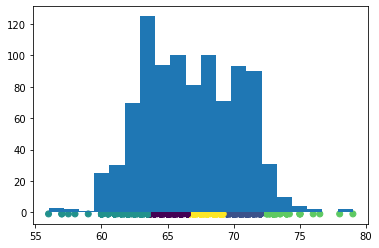

In [286]:
plt.hist(galton.childHeight.values.reshape((-1,1 )), bins=20)
plt.scatter(galton.childHeight.values.reshape((-1,1 )) ,-np.ones(galton.childHeight.values.reshape((-1,1 )).shape), c=classes5)

This is somewhat less than breathtaking.  This is all k-means gives us for this dataset.

Try running it a few more times?


In [287]:
km5s =[]
for i in range(20):
    km5 = KMeans(n_clusters=5).fit(galton.childHeight.values.reshape((-1,1)))
    classes5 = km5.predict(galton.childHeight.values.reshape((-1,1 )))
    km5s.append(classes5)


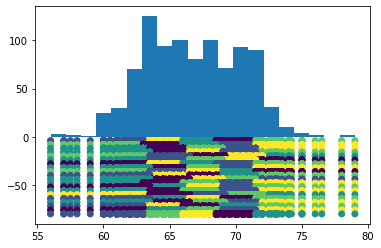

In [288]:
plt.hist(galton.childHeight.values.reshape((-1,1 )), bins=20)
for i in range(len(km5s)):
    plt.scatter(galton.childHeight.values.reshape((-1,1 )) ,-(i+1)* 4* np.ones(galton.childHeight.values.reshape((-1,1 )).shape), c=km5s[i])

We now see we don't get the same groupings every time.

What about the size of the groupings?  Does
k-means pay attention to the number of points 
or to the distance between clusters?
 
You can already see it here, though; the groupings at 
the extreme large and small heights are large.

In [289]:
km25s =[]
for i in range(20):
    km25 = KMeans(n_clusters=25).fit(galton.childHeight.values.reshape((-1,1)))
    classes25 = km25.predict(galton.childHeight.values.reshape((-1,1 )))
    km25s.append(classes25)

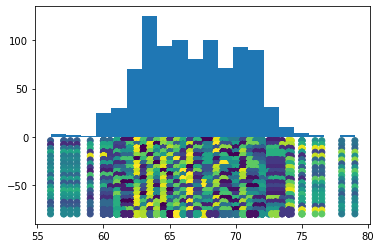

In [290]:
plt.hist(galton.childHeight.values.reshape((-1,1 )), bins=20)
for i in range(len(km25s)):
    plt.scatter(galton.childHeight.values.reshape((-1,1 )) ,-(i+1)* 4* np.ones(galton.childHeight.values.reshape((-1,1 )).shape), c=km25s[i])

In [ ]:
# This is pretty clear; the wings of the distribution,
# where point densities are low, have fewer clusters.


In [291]:
penguins = pd.read_json("penguins.json")

In [292]:
def penguincleanit(data):
    data["SP1"] = data.Species == "Adelie"
    data["SP2"] = data.Species == "Gentoo"
    data["SP3"] = data.Species == "Chinstrap"
    # construct a class label... Adelie, Gentoo, Chinstrap. 
    # Alphabetical order would probably be a better choice.  WHY? 
    data["LABEL"] = data["SP2"] + 2 * data["SP3"]  
    # I don't know how I'm going to keep Depth / mass / flipper /length straight.
    return data[np.isfinite( data["Beak Depth (mm)"]) & 
                        np.isfinite( data["Body Mass (g)"]) &
                        np.isfinite( data["Flipper Length (mm)"]) & 
                        np.isfinite( data["Beak Length (mm)"])] 
                   
penguinclean = penguincleanit(penguins)
penguins = penguinclean
colors = { "Adelie" : "green", "Gentoo": "blue", "Chinstrap": "red"}
cmap = penguins.Species.map(colors)

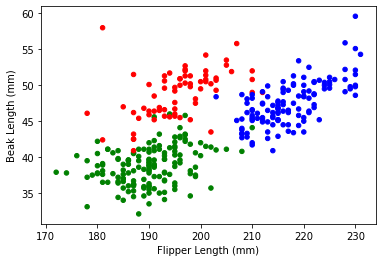

In [293]:
penguins[["Flipper Length (mm)", "Beak Length (mm)"]].plot("Flipper Length (mm)", "Beak Length (mm)", kind="scatter", color = cmap)
plt.savefig("PENGUIN.png", dpi=300, bbox_inches="tight")

In [294]:
X = penguins[["Beak Depth (mm)", "Body Mass (g)", "Flipper Length (mm)","Beak Length (mm)"]]
Y = penguins[["SP1", "SP2", "SP3"]]

In [295]:
x1 = X["Flipper Length (mm)"]; x2 = X[ "Beak Length (mm)"]

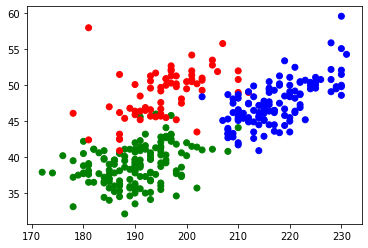

In [296]:
plt.scatter(x1, x2, color=cmap)

In [297]:
kmp2 = KMeans(n_clusters=2).fit(X)
kmc2 = kmp2.predict(X)

Text(0, 0.5, 'Beak Length (mm)')

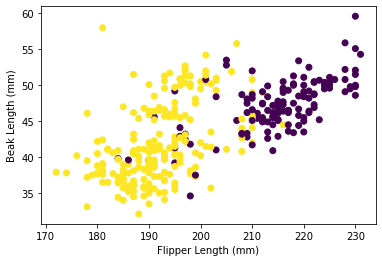

In [298]:
plt.scatter(x1, x2, c=kmc2)
plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")

In [299]:
X_1_2 = penguins[[ "Flipper Length (mm)","Beak Length (mm)"]]
km2p2 = KMeans(n_clusters=2).fit(X_1_2)
km2c2 = km2p2.predict(X_1_2)

Text(0, 0.5, 'Beak Length (mm)')

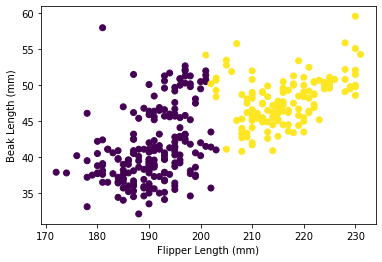

In [300]:
plt.scatter(x1, x2, c=km2c2)
plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")

In [301]:
km3p2 = KMeans(n_clusters=3).fit(X_1_2)
km3c2 = km3p2.predict(X_1_2)

Text(0, 0.5, 'Beak Length (mm)')

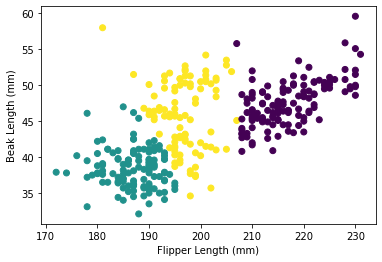

In [302]:
plt.scatter(x1, x2, c=km3c2)
plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")

In [ ]:
# Running this a few times, the result seems to be stable.


Text(0, 0.5, 'Beak Length (mm)')

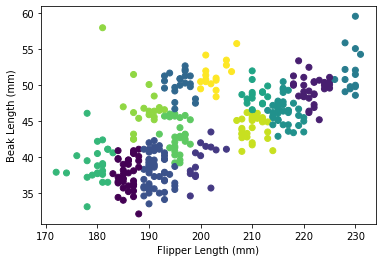

In [303]:
km13p2 = KMeans(n_clusters=13).fit(X_1_2)
km13c2 = km13p2.predict(X_1_2)
plt.scatter(x1, x2, c=km13c2)
plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")

In [304]:
predict =[]
rangek = range(2,20)    # If I don't set it to a variable, it's in my code twice.
for k in rangek:
    kmkp2 = KMeans(n_clusters=k).fit(X_1_2)
    kmkc2 = kmkp2.predict(X_1_2)

    

Text(0, 0.5, 'Beak Length (mm)')

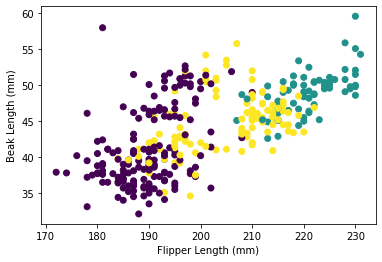

In [305]:
km3 = KMeans(n_clusters=3).fit(X)
km3 = km3.predict(X)
plt.scatter(x1, x2, c=km3)
plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")

In [ ]:
km3

In [ ]:
truth = penguins.SP2 + 2 * penguins.SP3

In [ ]:
index_truth = truth * 10 + km3 

In [ ]:
Counter(index_truth)

In [ ]:
# Truth 0 
#  116   0     35
# Truth 1
# 1     68     54
# Truth 2 
# 53    0      15  

In [ ]:
# This is not good accuracy, but this classifier doesn't know anything
# about anything.

In [ ]:
km_coord= km3p2.transform(X_1_2)

In [ ]:
km_coord.shape, X_1_2.shape

In [ ]:
km_coord

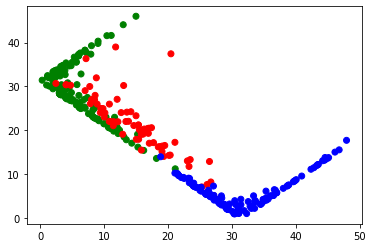

In [311]:
plt.scatter(km_coord[:,0],km_coord[:,1], c=cmap)

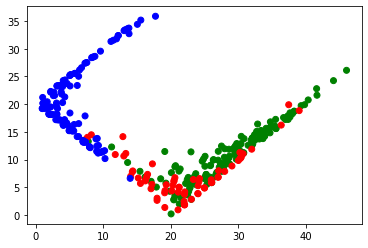

In [312]:
plt.scatter(km_coord[:,1],km_coord[:,2], c=cmap)

In [ ]:
# transform() is clearly the distance from each cluster's centroid,
# which is why it has n x k components.

In [ ]:
# Maybe we can make use of the cluster centers?
km3.cluster_centers_

In [ ]:
km3 = KMeans(n_clusters=3).fit(X)
km3p = km3.predict(X)
plt.scatter(x1, x2, c=km3p)
plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")
cl = km3.cluster_centers_
plt.scatter(list(cl[:,2]), list(cl[:,3]), color="black", s=300, alpha=0.4)

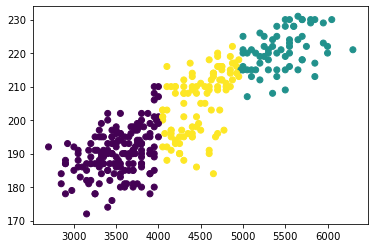

In [306]:
km3 = KMeans(n_clusters=3).fit(X)
km3 = km3.predict(X)
plt.scatter(X["Body Mass (g)"], X["Flipper Length (mm)"], c=km3)
# plt.xlabel("Flipper Length (mm)"); plt.ylabel( "Beak Length (mm)")

In [ ]:
# Ouch, okay, it did all of the clustering on body mass.  

In [307]:
from sklearn import preprocessing
Xscaled = preprocessing.StandardScaler().fit_transform(X)


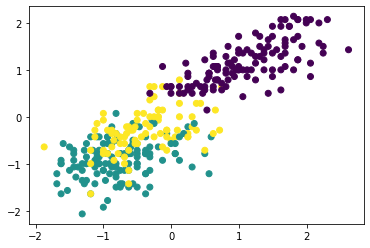

In [308]:
km3 = KMeans(n_clusters=3).fit(Xscaled)
km3 = km3.predict(Xscaled)
plt.scatter(Xscaled[:,1], Xscaled[:,2], c=km3)


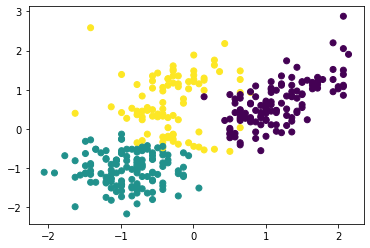

In [309]:
km3o = KMeans(n_clusters=3).fit(Xscaled)
km3 = km3o.predict(Xscaled)
plt.scatter(Xscaled[:,2], Xscaled[:,3], c=km3)

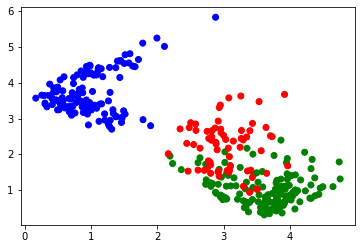

In [310]:
plt.scatter(km3o.transform(Xscaled)[:,0],km3o.transform(Xscaled)[:,1], c=cmap)

In [ ]:
# Well this looks very different from the kmeans transformed 
# coordinates above... I'll guess this is an artifact of the
# 1-d scaling.


In [313]:
def mean_diff(x, kmeansresult):
    clusters = kmeansresult.cluster_centers_
    classes = kmeansresult.predict(x)
    centers = clusters[classes]
    sumsqerror = np.sum((x-centers)**2)
    return(sumsqerror)

gof = []
krange=  range(2,20)
for k in krange:
    km = KMeans(n_clusters=k).fit(Xscaled)
    goodness = mean_diff(Xscaled, km)
    gof.append(goodness)


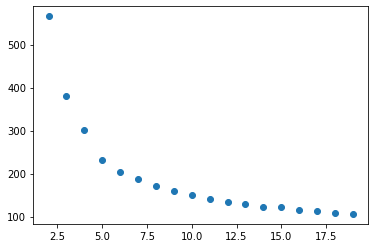

In [314]:
plt.plot(krange, gof, 'o')

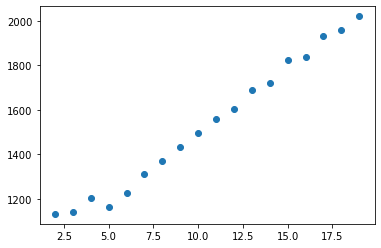

In [315]:
plt.plot(krange, gof*np.array(krange), 'o')

In [ ]:
# kmeans seems to favor k=3 and k=5 by the completely unscientific 
# "The error stops falling by as much" measure

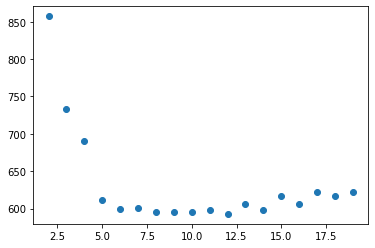

In [316]:
plt.plot(krange, gof*np.power(np.array(krange), +0.60
                             ), 'o')